In [27]:
import os.path as osp
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.insert(0, "../src/")


In [28]:
# Plot params
mpl.style.use("seaborn-dark")
mpl.rcParams['axes.grid'] = True
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['figure.dpi'] = 85
mpl.rcParams['axes.labelsize'] = 'large'


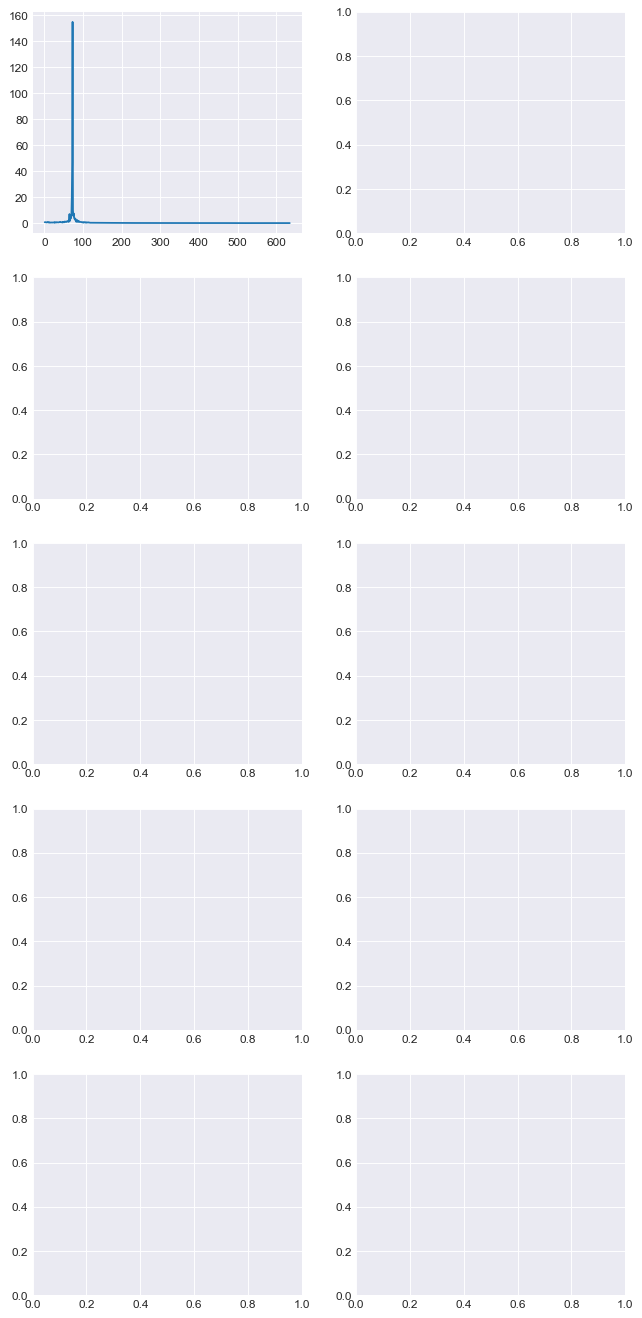

In [56]:
def plot_task_results(results_df: pd.DataFrame, attr: str, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1)

    num_features = results_df['num_features'].iloc[0]
    ymin,ymax = np.inf,-np.inf
    attr_mn, attr_mdl, attr_pnml,attr_pnml_isit = attr + '_mn_mean', attr + '_mdl_mean', attr + '_pnml_mean', attr + '_pnml_isit_mean'
    if attr_mn in results_df:
        ax.plot(results_df['trainset_size'], results_df[attr_mn], label='Minimum norm')
        ymin,ymax = min(ymin, results_df[attr_mn].min()),max(ymax, results_df[attr_mn].max())
    if attr_mdl in results_df:
        ax.plot(results_df['trainset_size'], results_df[attr_mdl], label='MDL')
        ymin,ymax = min(ymin, results_df[attr_mdl].min()),max(ymax, results_df[attr_mdl].max())
    if attr_pnml in results_df:
        ax.plot(results_df['trainset_size'], results_df[attr_pnml], label='pNML')
        ymin,ymax = min(ymin, results_df[attr_pnml].min()),max(ymax, results_df[attr_pnml].max())
    if attr_pnml_isit in results_df:
        ax.plot(results_df['trainset_size'], results_df[attr_pnml_isit], label='pNML ISIT')
        ymin,ymax = min(ymin, results_df[attr_pnml_isit].min()),max(ymax, results_df[attr_pnml_isit].max())
    ax.axvline(x=num_features, color='r', label='Num Features', linewidth=1.0, linestyle='--')

    ax.set_yscale('log')
    ax.set_xscale('log')

    #     # student t test 
    #     lower, upper = st.t.interval(0.95, results_df[attr + '_mn'], loc=dataset_df[attr + '_mn'],
    #                                  scale=dataset_df[attr + '_mn_sem'])
    #     ax.fill_between(results_df['trainset_size'], lower, upper, color='C0', alpha=.1)
    #     lower, upper = st.t.interval(0.95, results_df[attr + '_mdl'], loc=dataset_df[attr + '_mdl'],
    #                                  scale=dataset_df[attr + '_mdl_sem'])
    #     ax.fill_between(results_df['trainset_size'], lower, upper, color='C1', alpha=.08)
#     ylim_max = results_df[[s for s in [attr_mn, attr_mdl, attr_pnml] if s in results_df]].max().max()
#     ylim_min = results_df[[s for s in [attr_mn, attr_mdl, attr_pnml] if s in results_df]].min().min()
    ax.set_ylim(ymin, ymax)
    return ax


In [63]:
# adaptive var
res_path = osp.join('..', 'output', 'real_data_20200709_134604', 'results.csv')

# constant var
# res_path = osp.join('..', 'output', 'real_data_20200709_140045', 'results.csv')



res_df = pd.read_csv(res_path)
dataset_names = res_df['dataset_name'].unique()
print(dataset_names)
res_df.head()


['4544_GeographicalOriginalofMusic' '505_tecator' '583_fri_c1_1000_50'
 '588_fri_c4_1000_100' '603_fri_c0_250_50' '607_fri_c4_1000_50'
 '616_fri_c4_500_50' '618_fri_c3_1000_50' '622_fri_c2_1000_50'
 '626_fri_c2_500_50']


,dataset_name,trainset_size,valset_size,testset_size,num_features,n_trails,time,task_index,num_tasks,test_mse_mn_mean,...,train_mse_mdl_sem,theta_norm_mdl_mean,theta_norm_mdl_std,theta_norm_mdl_sem,test_logloss_mdl_mean,test_logloss_mdl_std,test_logloss_mdl_sem,variance_mdl_mean,variance_mdl_std,variance_mdl_sem
0,4544_GeographicalOriginalofMusic,1,212,212,118,5,55.860267,0,127,0.930748,...,0.083789,1.821602e-07,3.464941e-07,1.732471e-07,1.410987,0.097810,0.048905,0.996703,0.060187,0.030093
1,4544_GeographicalOriginalofMusic,2,212,212,118,5,47.902605,1,127,0.994695,...,0.076209,1.530418e-05,2.905965e-05,1.452983e-05,1.415907,0.060495,0.030248,0.930647,0.046415,0.023208
2,4544_GeographicalOriginalofMusic,3,212,212,118,5,49.559454,2,127,0.970550,...,0.058791,1.143365e-04,2.281385e-04,1.140693e-04,1.411426,0.054788,0.027394,0.966962,0.059528,0.029764
3,4544_GeographicalOriginalofMusic,4,212,212,118,5,46.971986,3,127,0.776912,...,0.073596,3.385063e-05,4.423494e-05,2.211747e-05,1.356827,0.085475,0.042737,0.939704,0.087683,0.043841
4,4544_GeographicalOriginalofMusic,5,212,212,118,5,52.725330,4,127,0.638343,...,0.026586,5.906234e-05,9.432372e-05,4.716186e-05,1.328180,0.125523,0.062762,0.971748,0.099139,0.049569


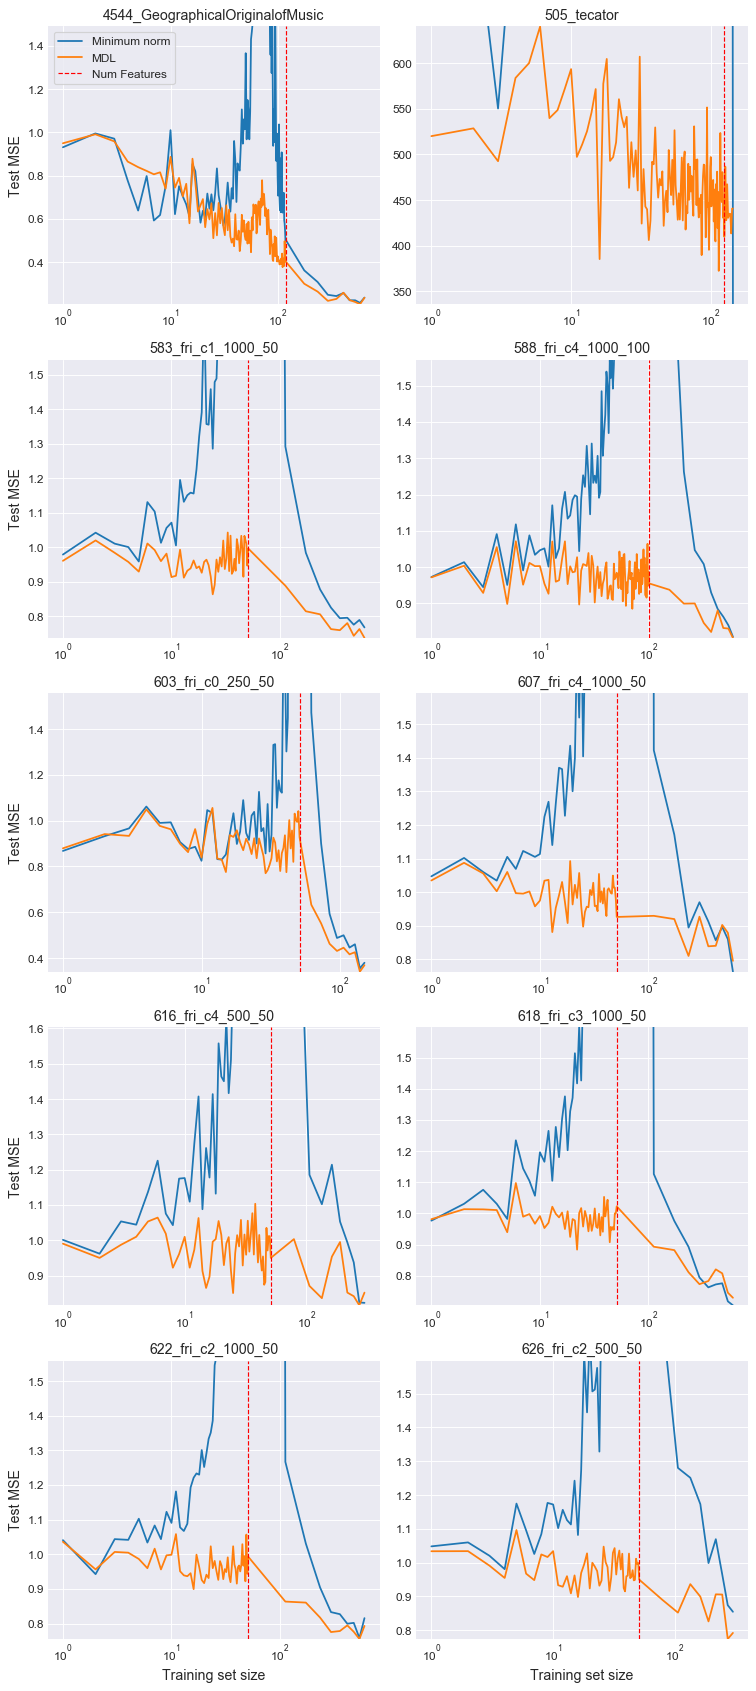

In [64]:
w, h = plt.rcParams.get('figure.figsize')
row_num = int(np.ceil(len(dataset_names) / 2))
fig, axs = plt.subplots(row_num, 2, figsize=(1.5 * w, h * row_num))
axs_flat = axs.flatten()
for i, dataset_name in enumerate(dataset_names):
    ax = axs_flat[i]
    dataset_df = res_df[res_df['dataset_name'] == dataset_name]
    ax = plot_task_results(dataset_df, attr='test_mse', ax=ax)
    ax.set_title(dataset_name)
    ax.set_yscale('linear')
    if 'test_mse_mdl_mean' in dataset_df:
        ax.set_ylim(top=dataset_df['test_mse_mdl_mean'].max() + 0.5)

axs_flat[0].legend()
[ax.set_xlabel('Training set size') for ax in axs_flat[-2:]]  # set x axis on last 2
[ax.set_ylabel('Test MSE') for ax in axs_flat[::2]]

plt.tight_layout()
plt.show()


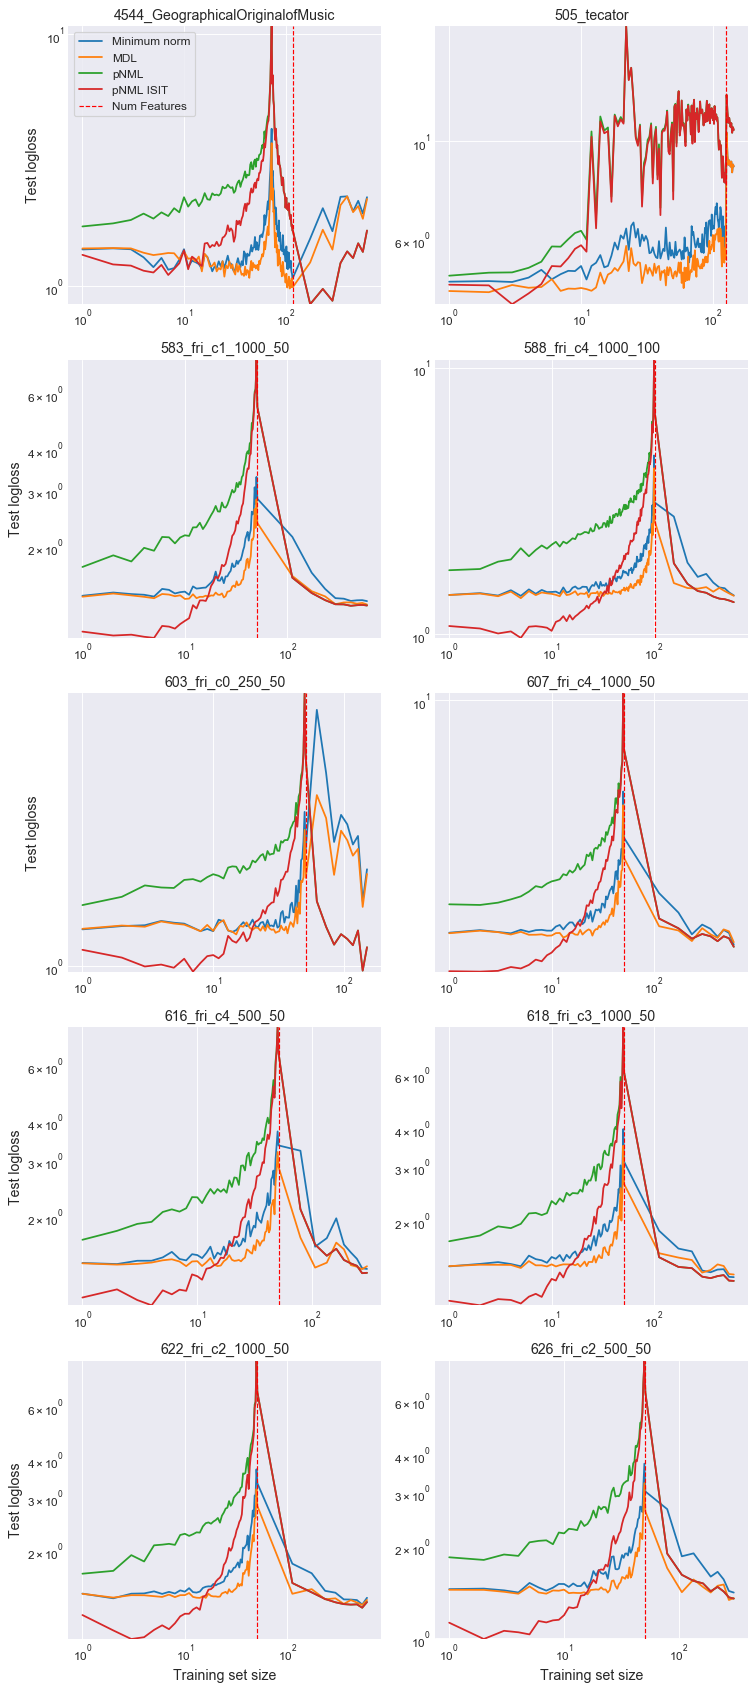

In [65]:
w, h = plt.rcParams.get('figure.figsize')
row_num = int(np.ceil(len(dataset_names) / 2))
fig, axs = plt.subplots(row_num, 2, figsize=(1.5 * w, h * row_num))
axs_flat = axs.flatten()
for i, dataset_name in enumerate(dataset_names):
    ax = axs_flat[i]
    dataset_df = res_df[res_df['dataset_name'] == dataset_name]
    ax = plot_task_results(dataset_df, attr='test_logloss', ax=ax)
    ax.set_title(dataset_name)
#     ax.set_yscale('linear')
#     if 'test_logloss_mdl_mean' in dataset_df:
#         ax.set_ylim(top=dataset_df['test_logloss_mdl_mean'].max() + 0.5)  # set limit based on machine precision
axs_flat[0].legend()
[ax.set_xlabel('Training set size') for ax in axs_flat[-2:]]  # set x axis on last 2
[ax.set_ylabel('Test logloss') for ax in axs_flat[::2]]

plt.tight_layout()
plt.show()
